In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file_path = '/Users/manu/Documents/road_accidents.csv'
file_path2 = '/Users/manu/Documents/miles_driven.csv'
miles_driven = pd.read_csv(file_path2, delimiter = '|')
road_accidents_data = pd.read_csv(file_path, skiprows = 9, delimiter = '|')

In [3]:

with open(file_path) as f:
    for line in iter(lambda: f.readline().rstrip(), '##### DATA BEGIN #####'):
        print(line)
f.close()


##### LICENSE #####
# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)
# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)
##### COLUMN ABBREVIATIONS #####
# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)
# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)
# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)
# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)


In [4]:
miles_driven.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [5]:
road_accidents_data.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [6]:
road_accidents_data.info()
miles_driven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [7]:
road_accidents_data.describe() #outliers in perc_fatl_speed

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


In [8]:
miles_driven.describe() #outliers

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


## Missing Values

In [9]:
road_accidents_data.isna().sum()

state                   0
drvr_fatl_col_bmiles    0
perc_fatl_speed         0
perc_fatl_alcohol       0
perc_fatl_1st_time      0
dtype: int64

In [10]:
miles_driven.isna().sum()

state                     0
million_miles_annually    0
dtype: int64

In [11]:
road_accidents_data.shape

(51, 5)

In [12]:
miles_driven.shape

(51, 2)

array([[<AxesSubplot:title={'center':'drvr_fatl_col_bmiles'}>,
        <AxesSubplot:title={'center':'perc_fatl_speed'}>],
       [<AxesSubplot:title={'center':'perc_fatl_alcohol'}>,
        <AxesSubplot:title={'center':'perc_fatl_1st_time'}>]],
      dtype=object)

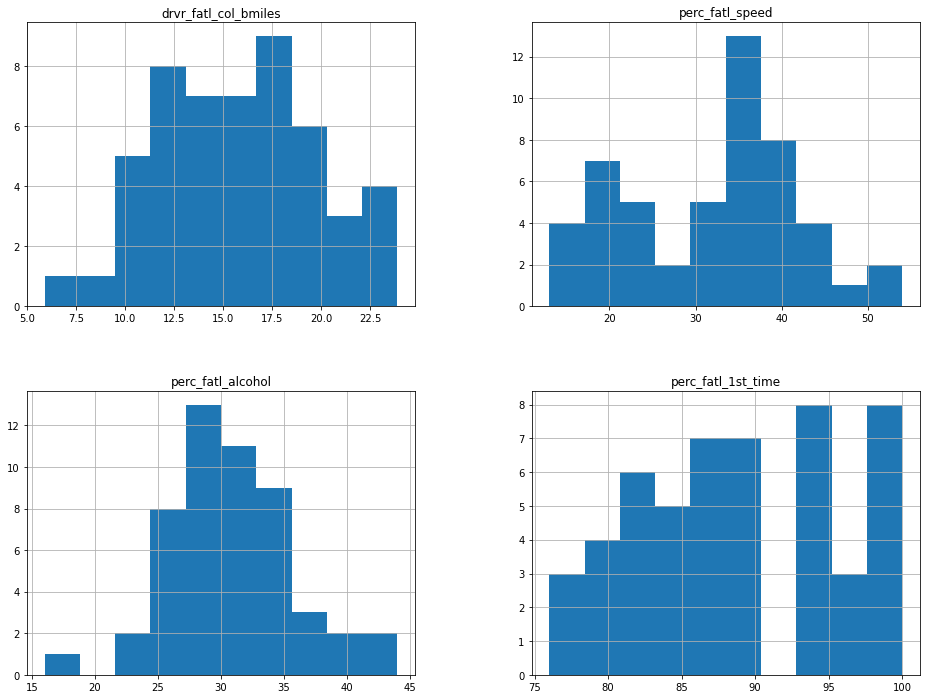

In [13]:
road_accidents_data.hist(bins=10, figsize=(16,12))

array([[<AxesSubplot:title={'center':'million_miles_annually'}>]],
      dtype=object)

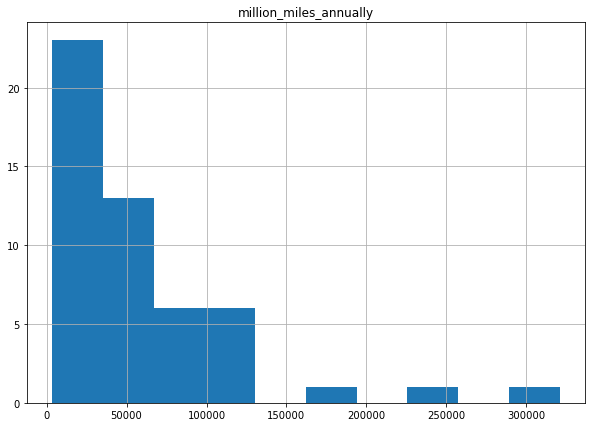

In [14]:
miles_driven.hist(bins=10, figsize=(10,7))

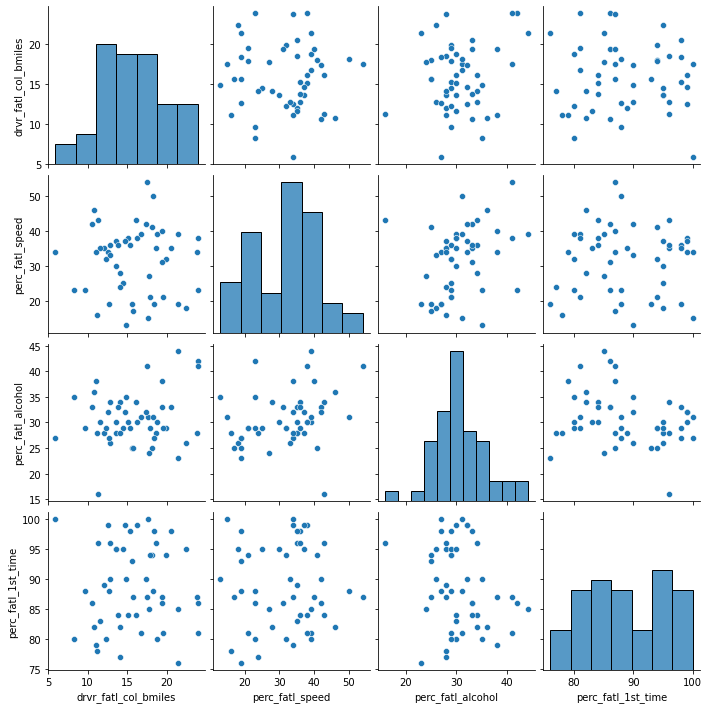

In [15]:
sns.pairplot(road_accidents_data)

<AxesSubplot:>

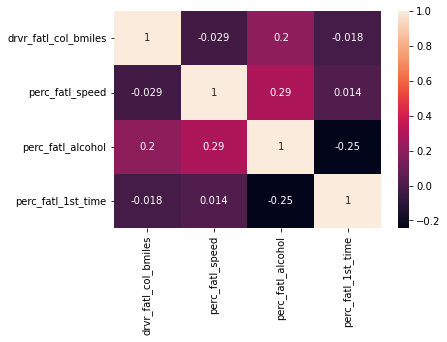

In [16]:
sns.heatmap(road_accidents_data.corr(), annot=True)

In [47]:
pd.concat([road_accidents_data,miles_driven],axis=1, join= 'inner')
merge_data = pd.merge(road_accidents_data,miles_driven, on='state')


#Correlation

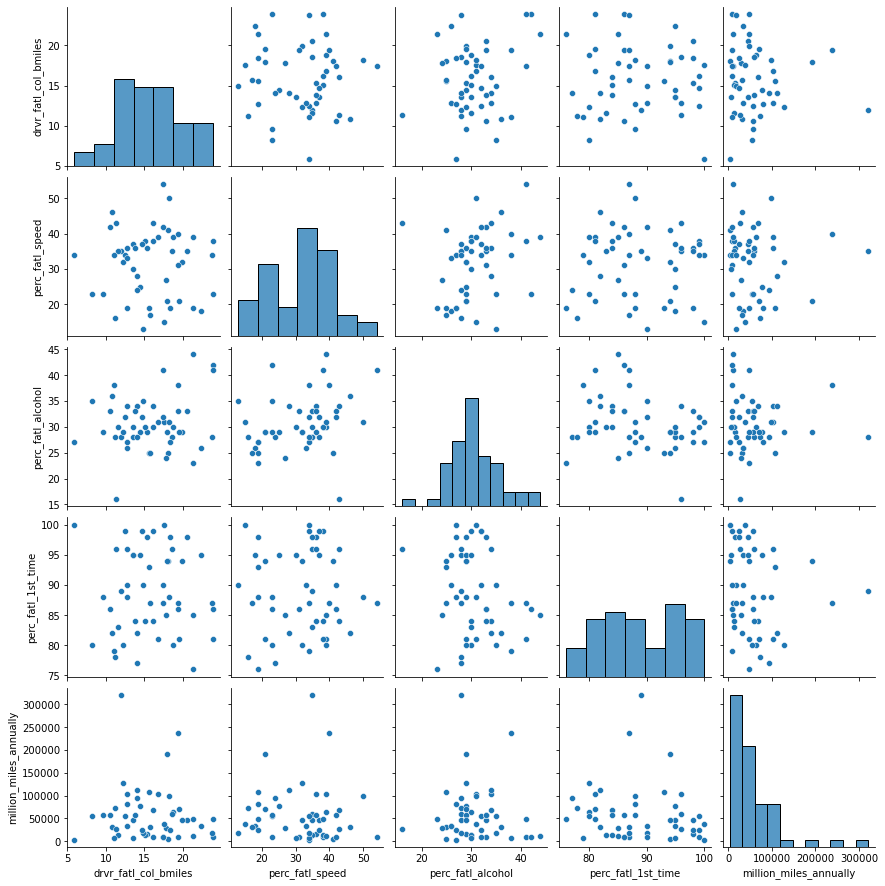

In [18]:
sns.pairplot(merge_data)

In [19]:
merge_data.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
count,51.000000,51.000000,51.000000,51.00000,51.000000
mean,15.790196,31.725490,30.686275,88.72549,57851.019608
std,4.122002,9.633438,5.132213,6.96011,59898.414088
min,5.900000,13.000000,16.000000,76.00000,3568.000000
25%,12.750000,23.000000,28.000000,83.50000,17450.000000
50%,15.600000,34.000000,30.000000,88.00000,46606.000000
75%,18.500000,38.000000,33.000000,95.00000,71922.500000
max,23.900000,54.000000,44.000000,100.00000,320784.000000


In [67]:
feat = ['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time','million_miles_annually','drvr_fatl_col_bmiles']
y = merge_data['drvr_fatl_col_bmiles']
X = merge_data[feat]
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)


In [68]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)
coefficeint_df = pd.DataFrame()
coefficeint_df["Column_Name"] = X.columns
coefficeint_df['Coefficient_Value'] = pd.Series(regr.coef_)
print(coefficeint_df)
print(regr.coef_)

              Column_Name  Coefficient_Value
0         perc_fatl_speed          -0.013645
1       perc_fatl_alcohol           0.157739
2      perc_fatl_1st_time          -0.066134
3  million_miles_annually          -0.000007
4    drvr_fatl_col_bmiles                NaN
[-1.36452082e-02  1.57738566e-01 -6.61336795e-02 -6.66387442e-06]


# scaling data

In [69]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-9.14301314e-17 -2.34017598e-16  8.83824604e-16 -3.26536184e-17
  6.29126381e-16]
[1. 1. 1. 1. 1.]


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

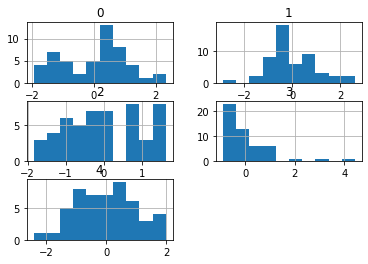

In [70]:
s = pd.DataFrame(X_scaled)

s.hist(bins=10)


#PCA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=len(X.columns))
Xt = pca.fit(X)
#plot = plt.scatter(Xt[:,0], Xt[:,3], c=y)
#plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
#plt.show()

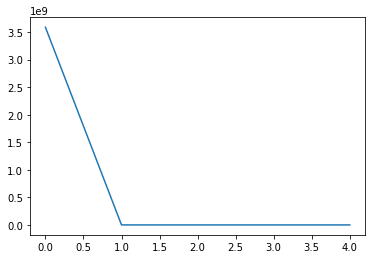

In [86]:
pca.n_components_
plt.plot(Xt.explained_variance_)

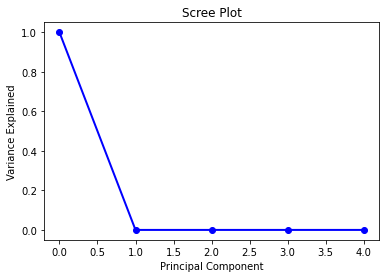

In [80]:
PC_values = np.arange(pca.n_components_) 
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [74]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 8)
 
#predict the labels of clusters.
label = kmeans.fit_predict(Xt)
 
print(label)

[7 0 3 6 4 3 6 0 0 5 1 0 0 1 7 6 6 3 3 0 3 3 1 3 6 7 0 0 6 0 7 6 1 1 0 1 3
 6 1 0 3 0 7 2 6 0 7 3 0 3 0]


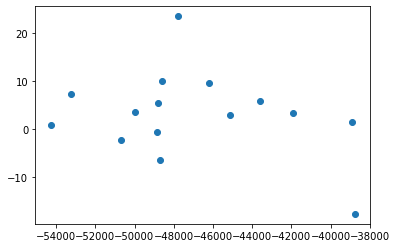

In [75]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = Xt[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

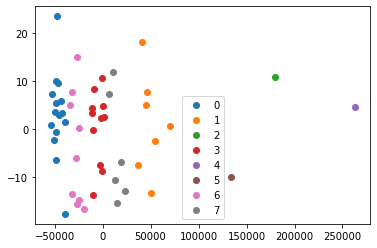

In [76]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(Xt[label == i , 0] , Xt[label == i , 1] , label = i)
plt.legend()
plt.show()